## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#your work here

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_regress_exog
import statsmodels.formula.api as sm

In [20]:
data_sets =[]
for i in np.arange(6):
    df = pd.read_excel("./Assignment4_linear_regresion_data.xlsx",
                       sheet_name=i,
                       names = ["y","x"],
                       skiprows=0)
    data_sets.append(df)
    print('Data set read, dimensions: {}'.format(df.shape))
    print(df.head(3))


Data set read, dimensions: (100, 2)
           y         x
0  38.858144  7.266278
1  40.891148  7.985333
2  48.971648  9.387120
Data set read, dimensions: (100, 2)
           y         x
0  28.045621  4.299210
1  39.148284  4.528143
2  17.361044  3.284988
Data set read, dimensions: (100, 2)
              y      x
0   6428.915770  9.517
1   2640.000728  5.113
2  12858.599267  9.773
Data set read, dimensions: (100, 2)
              y       x
0  1.887192e+05  5.9947
1  7.107264e+03  3.9492
2  3.729064e+06  9.6353
Data set read, dimensions: (101, 2)
           y       x
0  47.320319  9.0527
1  39.862491  7.3135
2  42.225779  8.6471
Data set read, dimensions: (101, 2)
           y       x
0  -2.764835  1.1290
1  61.065734  6.9100
2  52.854588  7.8374


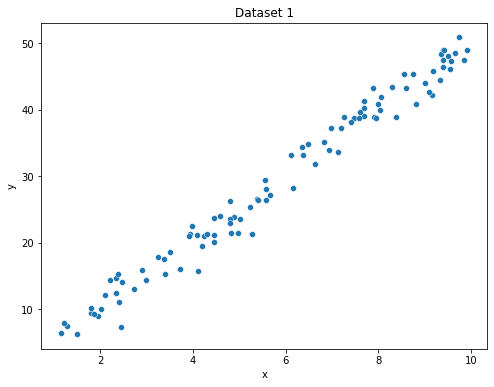

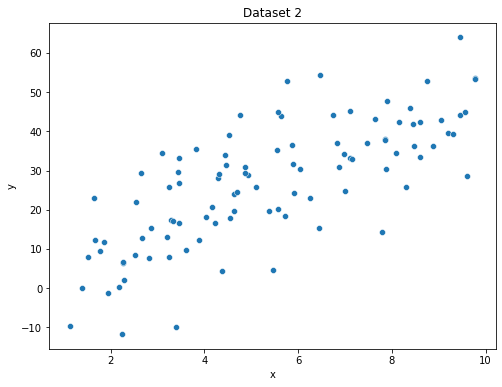

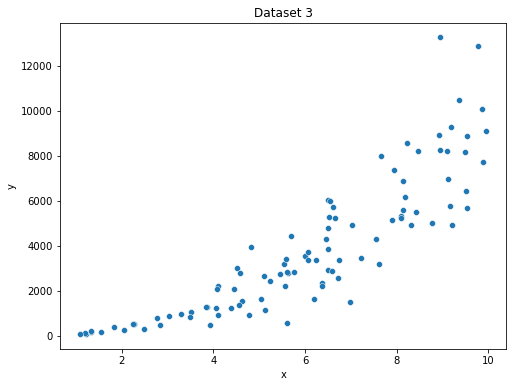

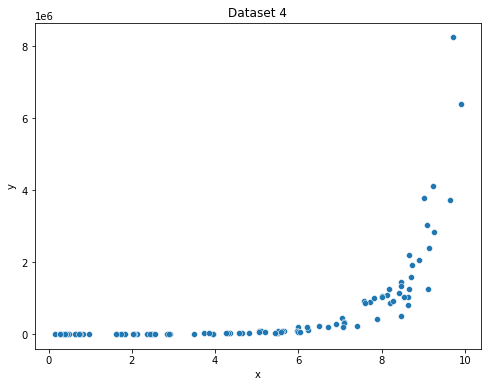

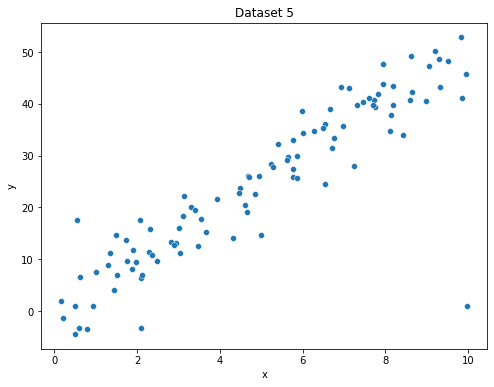

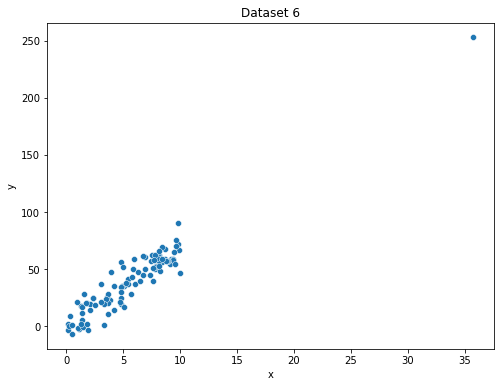

In [22]:
for i in np.arange(6):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.scatterplot(data = data_sets[i], x="x", y="y", ax=ax)
    ax.set_title("Dataset {}".format(i+1))

I will do polynomial transformation for data set 3 and 4.

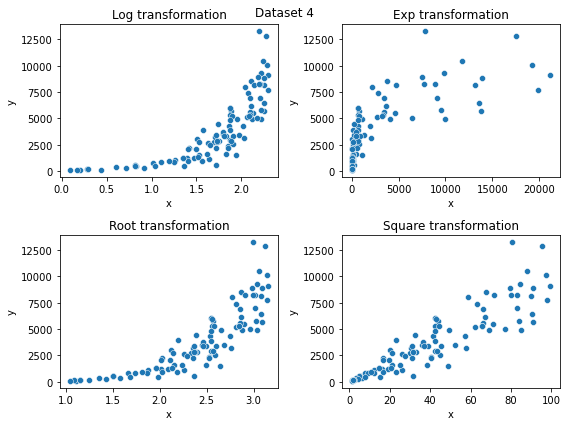

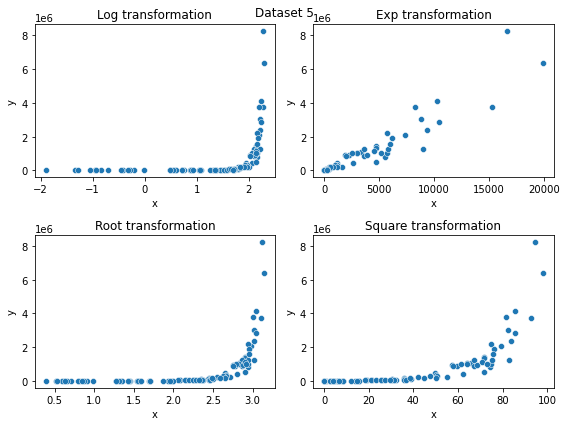

In [42]:
i=3
for df in data_sets[2:4]:
    x_log = np.log(df['x'])
    x_exp = np.exp(df['x'])
    x_root = np.sqrt(df['x'])
    x_sqr = df['x']**2

    fig, axs = plt.subplots(2,2, figsize=(8,6))
    axs[0,0].set_title("Log transformation")
    sns.scatterplot(data = df, x=x_log, y="y", ax=axs[0,0])
    axs[0,1].set_title("Exp transformation")
    sns.scatterplot(data = df, x=x_exp, y="y", ax=axs[0,1])
    axs[1,0].set_title("Root transformation")
    sns.scatterplot(data = df, x=x_root, y="y", ax=axs[1,0])
    axs[1,1].set_title("Square transformation")
    sns.scatterplot(data = df, x=x_sqr, y="y", ax=axs[1,1])
    plt.tight_layout()
    fig.suptitle("Dataset {}".format(i+1))
    i+=1



The best transformations are:
* Square for dataset 4
* Exponential for dataset 5

# Dataset 1

In [200]:
df = data_sets[0]

## Original dataset

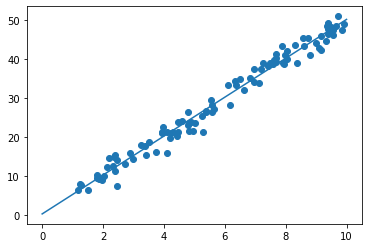

In [201]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [202]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.47e-84
Time:                        20:45:04   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [111]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 3., 11., 20., 18., 15., 15.,  7.,  6.,  2.,  3.]),
 array([-3.76334326, -2.86151775, -1.95969224, -1.05786673, -0.15604122,
         0.74578428,  1.64760979,  2.5494353 ,  3.45126081,  4.35308632,
         5.25491183]),
 <BarContainer object of 10 artists>)

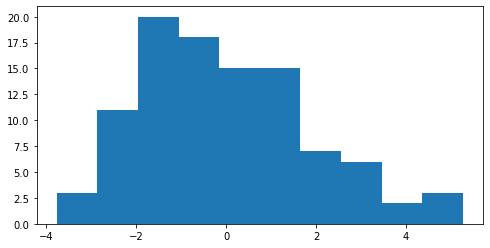

In [112]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


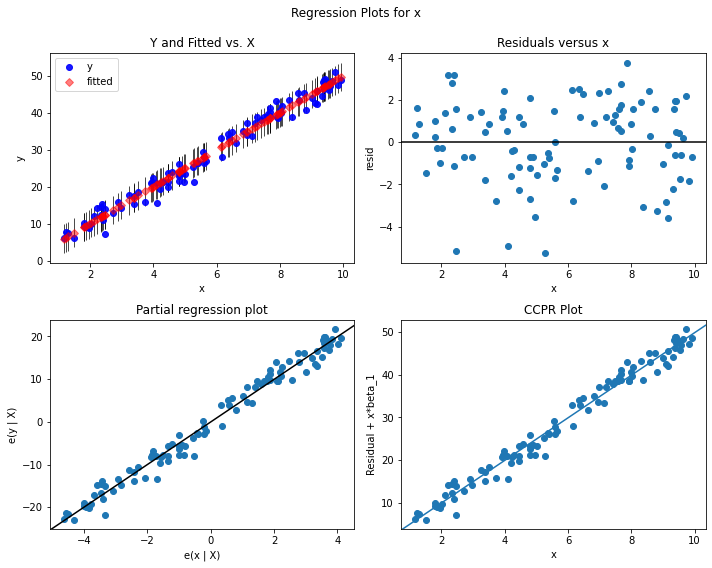

In [113]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

This model looks great. There's a high correlation and the residuals looks normal with mean zero and constant variance.

# Dataset 2

In [203]:
df = data_sets[1]

## Original dataset model

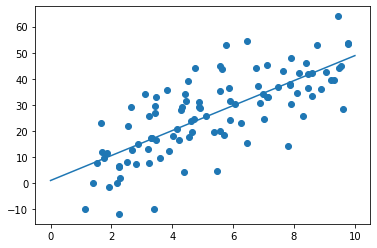

In [204]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [205]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           6.11e-19
Time:                        20:46:40   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [116]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 3.,  9.,  9., 12., 23., 19., 16.,  3.,  2.,  4.]),
 array([-24.27188864, -19.13159979, -13.99131094,  -8.85102209,
         -3.71073324,   1.4295556 ,   6.56984445,  11.7101333 ,
         16.85042215,  21.990711  ,  27.13099985]),
 <BarContainer object of 10 artists>)

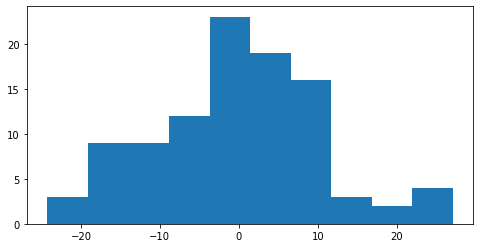

In [117]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


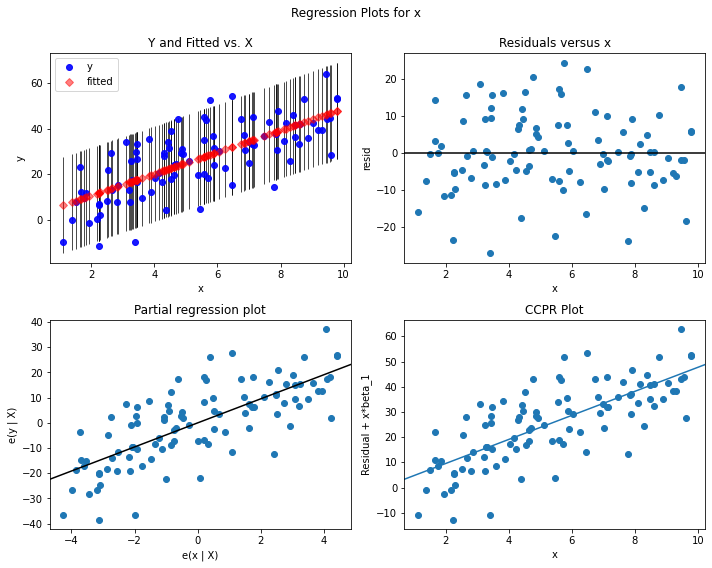

In [118]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

This model doesn't fit well, and it looks like there's not a transformation that can help. However, the residuals seems to be normal with mean zero and constant variance.

# Dataset 3

In [206]:
df = data_sets[2]

## Original dataset model

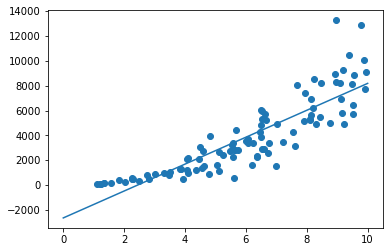

In [207]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [209]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.04e-31
Time:                        20:56:47   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [210]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 1.,  1.,  0.,  1., 13., 21., 22., 26., 13.,  2.]),
 array([-6202.11855202, -5241.24028558, -4280.36201915, -3319.48375272,
        -2358.60548628, -1397.72721985,  -436.84895342,   524.02931301,
         1484.90757945,  2445.78584588,  3406.66411231]),
 <BarContainer object of 10 artists>)

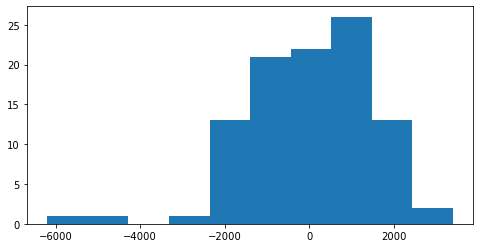

In [211]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


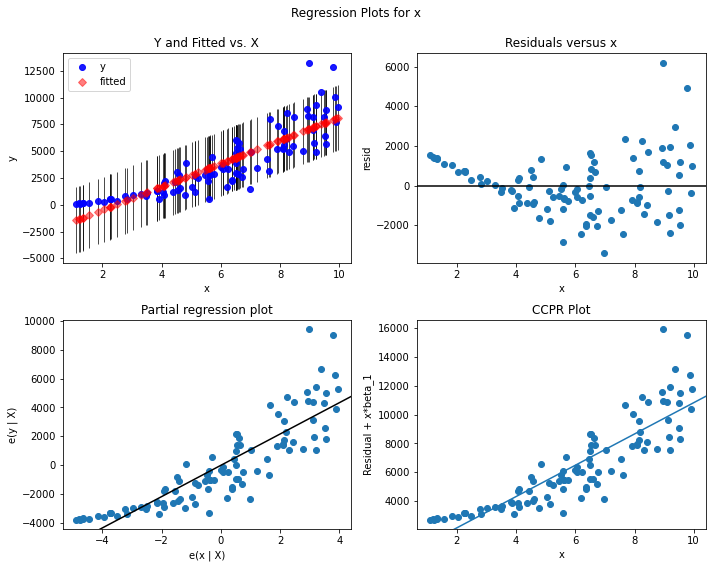

In [212]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

The model doesn't fit well and the residuals don´t seems to meet the assumptions. There's a possible transformations

## Transformed dataset model

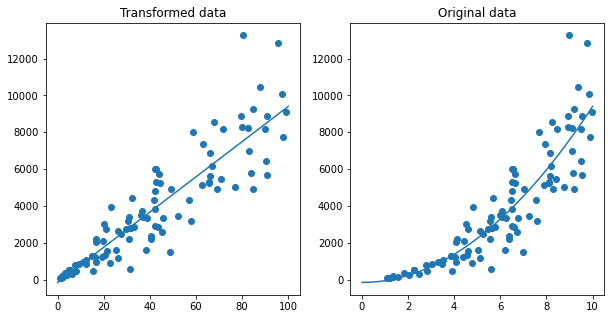

In [229]:
model = LinearRegression(fit_intercept=True)

model.fit((df['x']**2).values.reshape(-1, 1), df['y'])
Y = df['y']
X = df['x']**2
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()

xfit = np.linspace(0, 100, 1000)
#yfit = model.predict(xfit[:, np.newaxis])
intercept, slope = result.params
yfit = intercept + slope *(xfit)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Transformed data')
ax1.scatter((df['x']**2), df['y'])
ax1.plot(xfit, yfit)
ax2.set_title('Original data')
ax2.scatter((df['x']), df['y'])
ax2.plot(np.sqrt(xfit), yfit)


In [231]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     398.1
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.74e-36
Time:                        21:13:41   Log-Likelihood:                -862.34
No. Observations:                 100   AIC:                             1729.
Df Residuals:                      98   BIC:                             1734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -146.7050    242.218     -0.606      0.546    -627.379     333.969
x             95.4711      4.785     19.953      0.000      85.976     104.966
==============================================================================
Omnibus:                       19.529   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.658
Skew:                           0.724   Prob(JB):                     1.48e-09
Kurtosis:                       5.768   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [235]:
residuals = intercept + slope * df['x']**2 - df['y']

(array([ 1.,  0.,  1.,  2.,  9., 12., 42., 18.,  9.,  6.]),
 array([-5741.24335894, -4866.57181581, -3991.90027269, -3117.22872957,
        -2242.55718645, -1367.88564333,  -493.2141002 ,   381.45744292,
         1256.12898604,  2130.80052916,  3005.47207229]),
 <BarContainer object of 10 artists>)

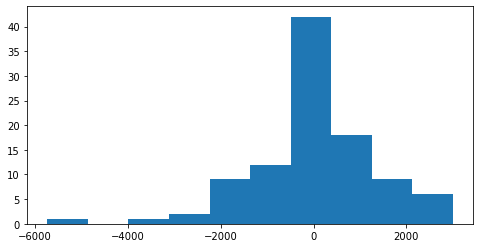

In [236]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


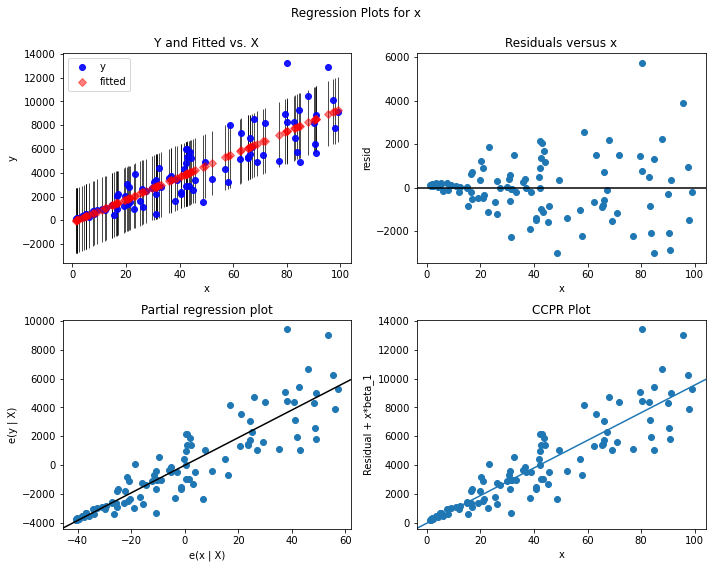

In [237]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

The model had a good improvment with the transformations. Also the residuals seems normal with mean zero, but the variance doesn't seems constant.

# Dataset 4

In [238]:
df = data_sets[3]

## Original dataset model

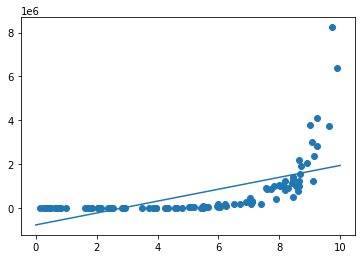

In [242]:
import statsmodels.formula.api as sm
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [244]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           8.87e-12
Time:                        21:19:03   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [245]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  2., 17., 26., 51.]),
 array([-6364011.23351969, -5623702.50174447, -4883393.76996925,
        -4143085.03819403, -3402776.30641881, -2662467.57464358,
        -1922158.84286836, -1181850.11109314,  -441541.37931792,
          298767.35245731,  1039076.08423253]),
 <BarContainer object of 10 artists>)

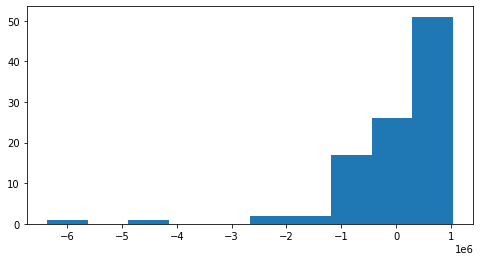

In [246]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


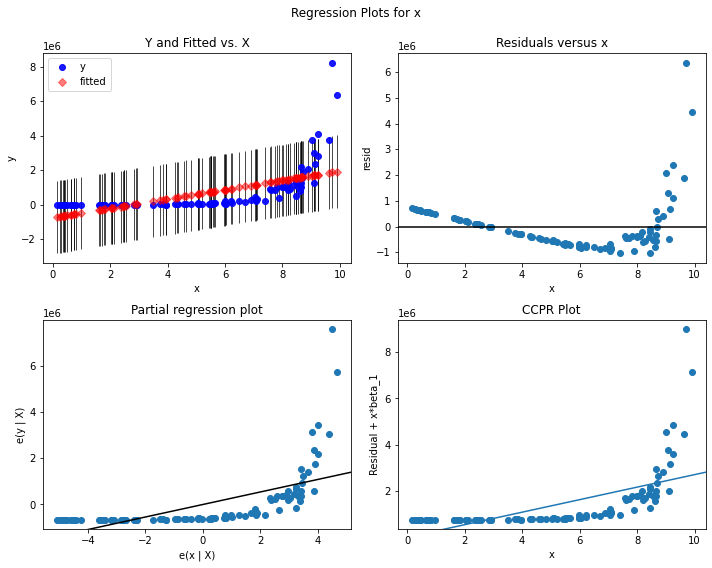

In [247]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

The model has a terrible performance, and the residuals  doesn't meet the assumptions. There´s a probaple tranformation.

## Transformed dataset model

C:\Users\BRUNO~1.GON\AppData\Local\Temp/ipykernel_2500/4069900880.py:23: RuntimeWarning: divide by zero encountered in log
  ax2.plot(np.log(xfit), yfit)


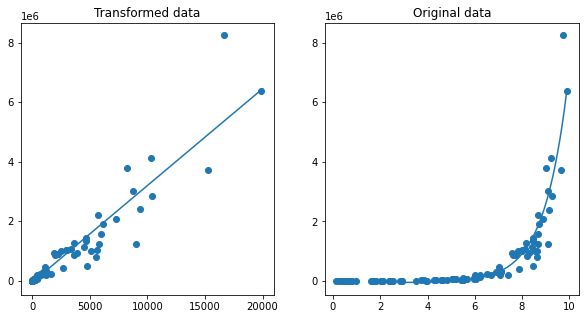

In [249]:
import statsmodels.api as sm

model = LinearRegression(fit_intercept=True)

model.fit(np.exp(df['x']).values.reshape(-1, 1), df['y'])

Y = df['y']
X = np.exp(df['x'])
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()

xfit = np.linspace(0, 20000, 1000)
yfit = model.predict(xfit[:, np.newaxis])
intercept, slope = result.params
#yfit = intercept + slope * xfit

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Transformed data')
ax1.scatter(np.exp(df['x']), df['y'])
ax1.plot(xfit, yfit)
ax2.set_title('Original data')
ax2.scatter((df['x']), df['y'])
ax2.plot(np.log(xfit), yfit)

In [250]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     754.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           7.93e-48
Time:                        21:22:14   Log-Likelihood:                -1441.9
No. Observations:                 100   AIC:                             2888.
Df Residuals:                      98   BIC:                             2893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.697e+04   5.18e+04     -1.100      0.274    -1.6e+05    4.58e+04
x            325.3544     11.846     27.466      0.000     301.847     348.861
==============================================================================
Omnibus:                       77.572   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1545.182
Skew:                           1.990   Prob(JB):                         0.00
Kurtosis:                      21.842   Cond. No.                     5.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results

In [251]:
residuals = intercept + slope * np.exp(df['x']) - df['y']

(array([ 1.,  0.,  0.,  1.,  1.,  6., 78.,  8.,  3.,  2.]),
 array([-2891229.15959573, -2439166.63377093, -1987104.10794613,
        -1535041.58212134, -1082979.05629654,  -630916.53047174,
         -178854.00464695,   273208.52117785,   725271.04700264,
         1177333.57282744,  1629396.09865224]),
 <BarContainer object of 10 artists>)

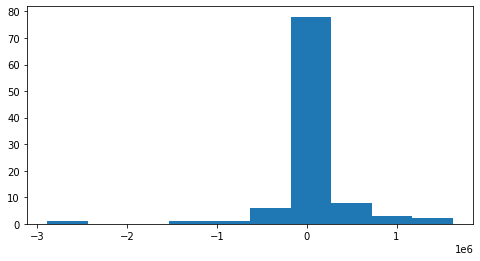

In [252]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


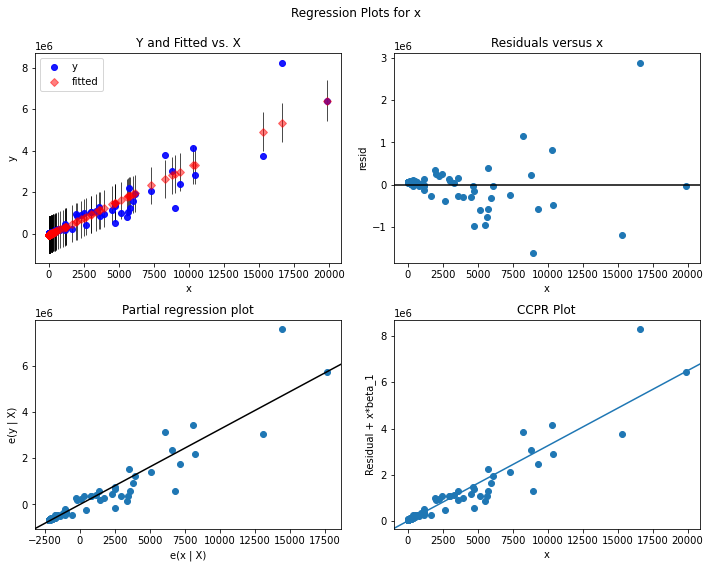

In [253]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

The model improves with the transformation, but the residuals don't meet the assumptions.

# Dataset 5

In [255]:
df = data_sets[4]

## Original dataset model

In [256]:
import statsmodels.formula.api as sm

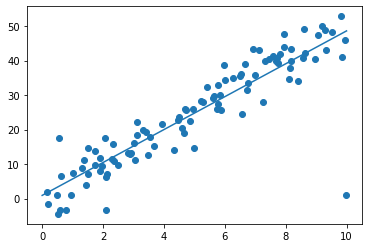

In [257]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [261]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.70e-37
Time:                        21:25:41   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [258]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 5., 39., 42., 13.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-14.0378184 ,  -7.89200684,  -1.74619528,   4.39961628,
         10.54542784,  16.69123939,  22.83705095,  28.98286251,
         35.12867407,  41.27448563,  47.42029718]),
 <BarContainer object of 10 artists>)

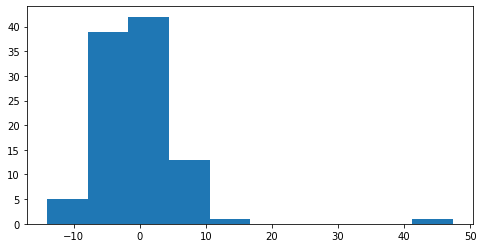

In [259]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


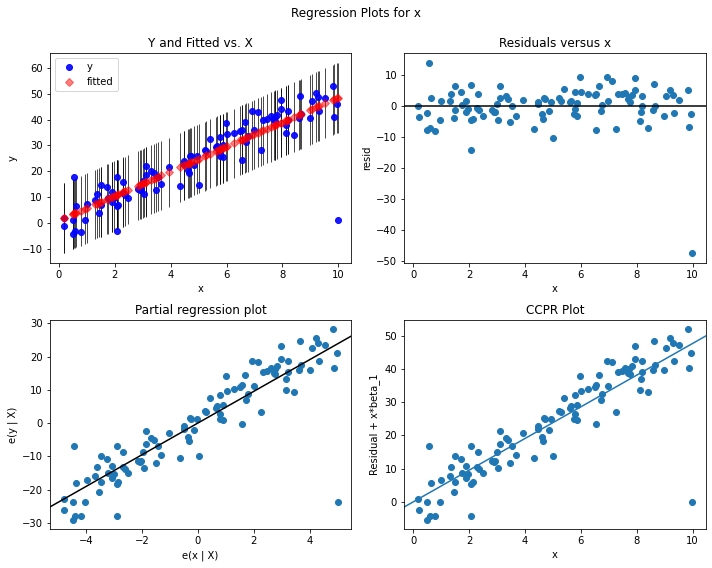

In [260]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

This models fits very well, and the residuals meet the assuptions except for the outlier. I'll try fit te model without the outlier.

## Model without outliers

In [262]:
df = df[(df['x']<8)|(df['y']>10)]

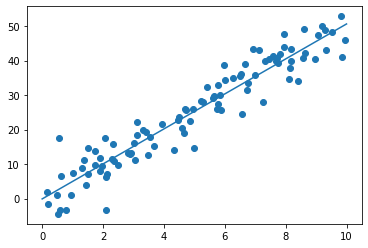

In [263]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [265]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           3.84e-52
Time:                        21:27:38   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
x              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [266]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 1.,  0.,  7., 11., 31., 20., 19.,  5.,  5.,  1.]),
 array([-14.88861075, -12.01542977,  -9.14224879,  -6.26906781,
         -3.39588683,  -0.52270585,   2.35047513,   5.22365611,
          8.09683708,  10.97001806,  13.84319904]),
 <BarContainer object of 10 artists>)

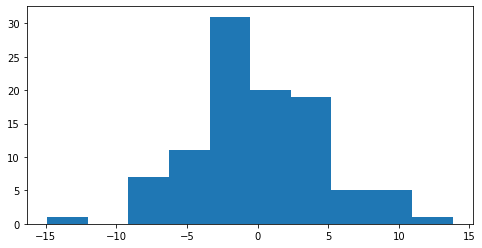

In [267]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


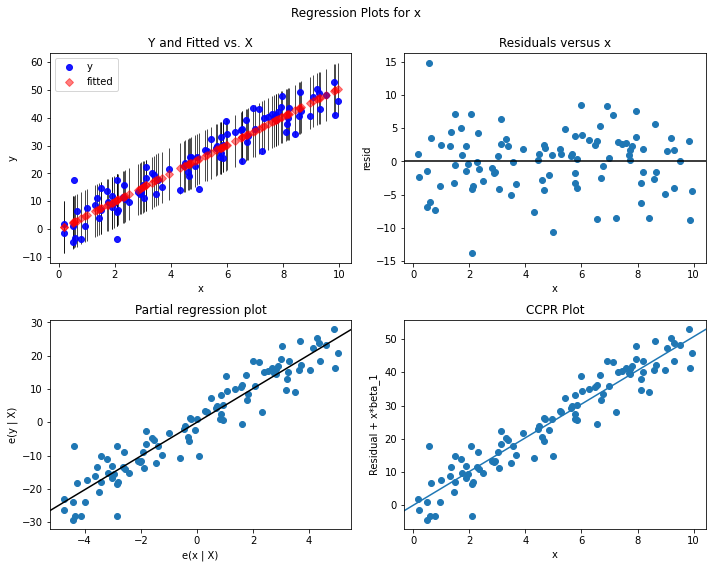

In [268]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

This model adjust even better. And meets all assumptions.

# Dataset 6

In [269]:
df = data_sets[5]

# Original dataset model

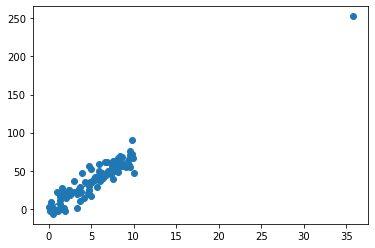

In [270]:
model = LinearRegression(fit_intercept=True)

#model.fit(df['x'].values.reshape(-1,1), df['y'])
result = sm.ols(formula='y ~ x', data=df).fit()

xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

intercept, slope = result.params
yfit = intercept + slope * xfit

plt.scatter(df['x'], df['y'])
plt.plot(xfit, yfit);

In [272]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.49e-54
Time:                        21:28:26   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [273]:
residuals = intercept + slope * df['x'] - df['y']

(array([ 3.,  6.,  3., 16., 21., 23., 12., 10.,  5.,  2.]),
 array([-23.29843165, -18.66324977, -14.02806789,  -9.39288601,
         -4.75770413,  -0.12252226,   4.51265962,   9.1478415 ,
         13.78302338,  18.41820526,  23.05338713]),
 <BarContainer object of 10 artists>)

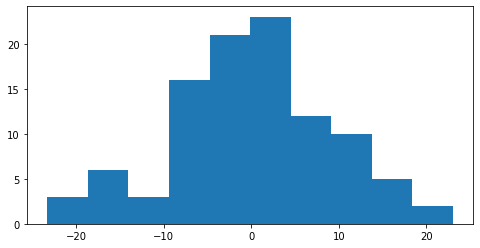

In [274]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(residuals)

eval_env: 1


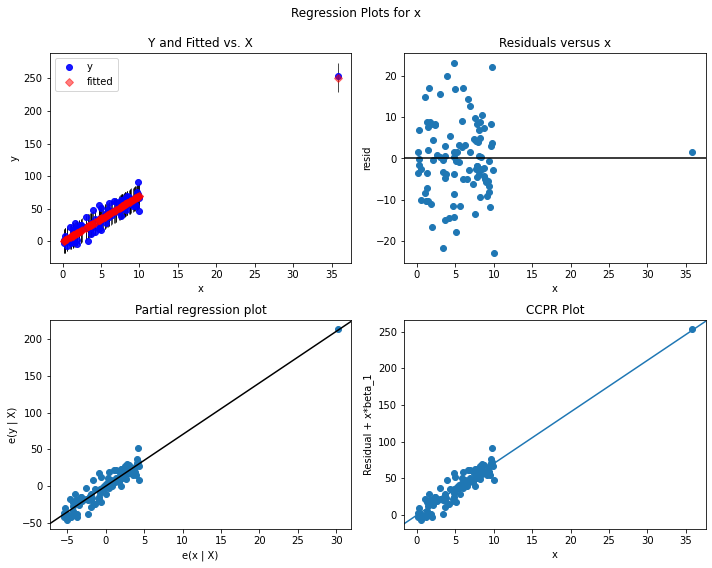

In [275]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(result, "x", fig = fig)

The model adjusto just fine, and even it seems to be an outlier, in realty is not an outlier because seems to follow the same pattern.